In [2]:
import os
import sys
import glob
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
df = pd.read_csv("./scripts_cleaning_successes/datasets/successes10000.csv")
df.describe()

,Unnamed: 0,danceability,duration,end_of_fade_in,energy,key,loudness,mode,start_of_fade_out,tempo,time_signature,e_grammy,e_billboard
count,10009.000000,10009.0,10009.000000,10009.000000,10009.0,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10005.000000
mean,5004.000000,0.0,250.053261,0.791261,0.0,5.319113,-10.075916,0.668099,241.372463,123.741619,3.582975,0.001099,0.085157
std,2889.493756,0.0,120.588557,1.915674,0.0,3.608304,5.203260,0.470919,118.657717,34.686759,1.199576,0.033135,3.232517
min,0.000000,0.0,2.585670,0.000000,0.0,0.000000,-52.839000,0.000000,2.586000,0.000000,0.000000,0.000000,0.000000
25%,2502.000000,0.0,181.341590,0.000000,0.0,2.000000,-12.552000,0.000000,173.784000,97.580000,3.000000,0.000000,0.000000
50%,5004.000000,0.0,229.041180,0.194000,0.0,5.000000,-8.903000,1.000000,220.601000,122.221000,4.000000,0.000000,0.000000
75%,7506.000000,0.0,290.272200,0.427000,0.0,9.000000,-6.349000,1.000000,281.403000,144.104000,4.000000,0.000000,0.000000
max,10008.000000,0.0,1797.694240,40.252000,0.0,11.000000,3.077000,1.000000,1786.070000,251.802000,7.000000,1.000000,139.000000


In [9]:
def drop_specific_cols(df, cols):
    df = df.drop(cols,axis=1)
    return df

In [46]:
def billboard_success(df):
    df.loc[df["e_billboard"] > 0, "e_billboard"] = 1
    return df

In [48]:
columns = ['Unnamed: 0', 'danceability','energy']
cleaned_df = drop_specific_cols(df, columns)
new_df = billboard_success(cleaned_df)
new_df.describe(include = 'all')

,duration,end_of_fade_in,key,loudness,mode,start_of_fade_out,tempo,time_signature,artist_name,title,e_grammy,e_billboard,e_spotify
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009,10009,10009.000000,10005.000000,10009
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8361,9786,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alphaville,Intro,NaN,NaN,0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,23,NaN,NaN,7369
mean,250.053261,0.791261,5.319113,-10.075916,0.668099,241.372463,123.741619,3.582975,NaN,NaN,0.001099,0.000700,NaN
std,120.588557,1.915674,3.608304,5.203260,0.470919,118.657717,34.686759,1.199576,NaN,NaN,0.033135,0.026443,NaN
min,2.585670,0.000000,0.000000,-52.839000,0.000000,2.586000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN
25%,181.341590,0.000000,2.000000,-12.552000,0.000000,173.784000,97.580000,3.000000,NaN,NaN,0.000000,0.000000,NaN
50%,229.041180,0.194000,5.000000,-8.903000,1.000000,220.601000,122.221000,4.000000,NaN,NaN,0.000000,0.000000,NaN
75%,290.272200,0.427000,9.000000,-6.349000,1.000000,281.403000,144.104000,4.000000,NaN,NaN,0.000000,0.000000,NaN


In [55]:
a = new_df.columns
for i in a[:-5]:
    print(i)

duration
end_of_fade_in
key
loudness
mode
start_of_fade_out
tempo
time_signature


In [63]:
#draw all the 7 boxplots we require for each column
def drawBoxPlotsByColumn(df, colName):
    print('Global boxplot by',colName)
    sns.boxplot(y = df[colName])
    plt.show()
    print('Boxplot grouped by grammy success')
    sns.boxplot(x = 'e_grammy', y = colName, data = df[[colName, 'e_grammy']] )
    plt.show()
    print('Boxplot grouped by billboard success')
    sns.boxplot(x = 'e_billboard', y = colName, data = df[[colName, 'e_billboard']] )
    plt.show()
    print('Boxplot grouped by spotify success')
    sns.boxplot(x = 'e_spotify', y = colName, data = df[[colName, 'e_spotify']] )
    plt.show()
    
def DrawBoxplotsNoWhiskersByColumn(df):
    print('Global boxplot by',colName)
    sns.boxplot(y = df[colName], whis=0)
    plt.show()
    print('Boxplot grouped by grammy success')
    sns.boxplot(x = 'e_grammy', y = colName, data = df[[colName, 'e_grammy']], whis=0)
    plt.show()
    print('Boxplot grouped by billboard success')
    sns.boxplot(x = 'e_billboard', y = colName, data = df[[colName, 'e_billboard']], whis=0)
    plt.show()
    print('Boxplot grouped by spotify success')
    sns.boxplot(x = 'e_spotify', y = colName, data = df[[colName, 'e_spotify']], whis=0)
    plt.show()

def drawAllBoxPlots(df):
    columns = df.columns[:-5]
    for col in columns:
        drawBoxPlotsByColumn(df, col)
    
    


Global boxplot by duration


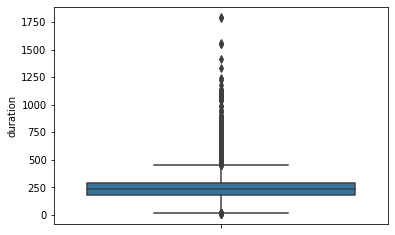

Boxplot grouped by grammy success


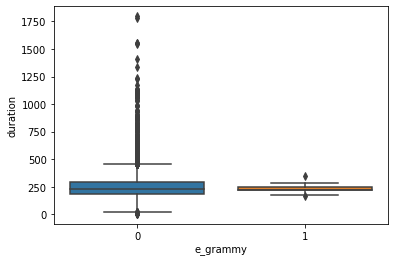

Boxplot grouped by billboard success


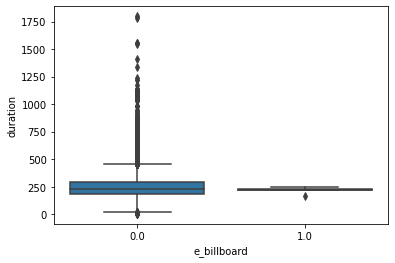

Boxplot grouped by spotify success


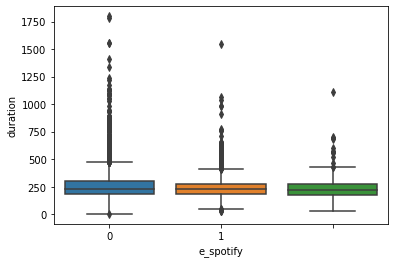

Global boxplot by end_of_fade_in


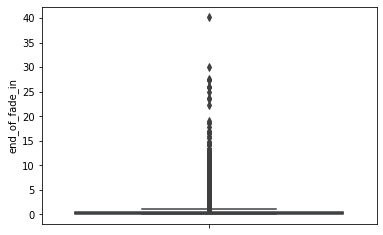

Boxplot grouped by grammy success


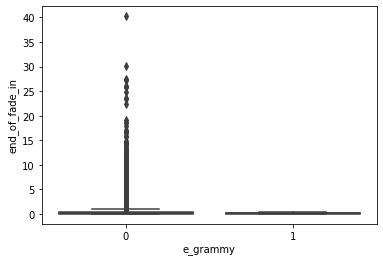

Boxplot grouped by billboard success


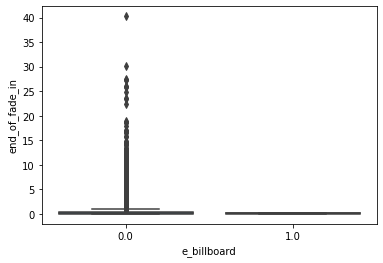

Boxplot grouped by spotify success


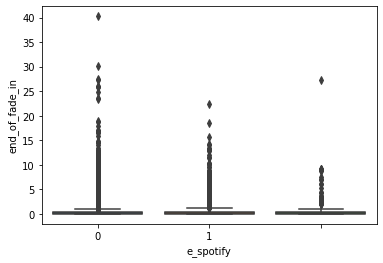

Global boxplot by key


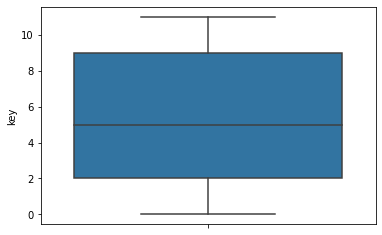

Boxplot grouped by grammy success


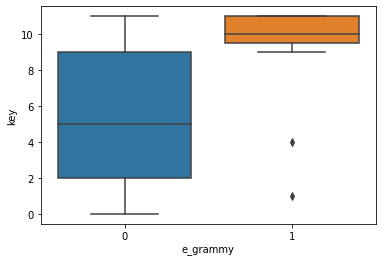

Boxplot grouped by billboard success


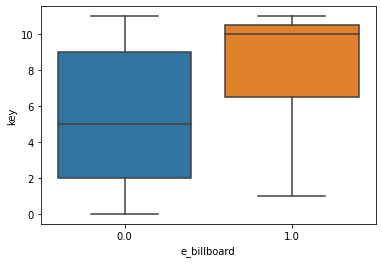

Boxplot grouped by spotify success


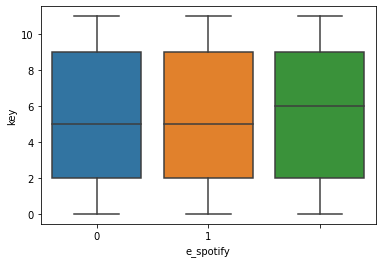

Global boxplot by loudness


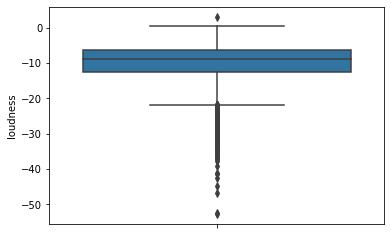

Boxplot grouped by grammy success


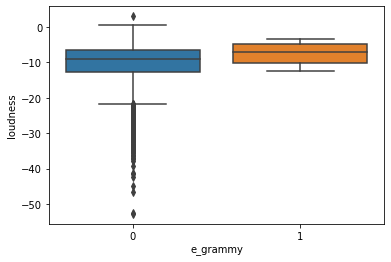

Boxplot grouped by billboard success


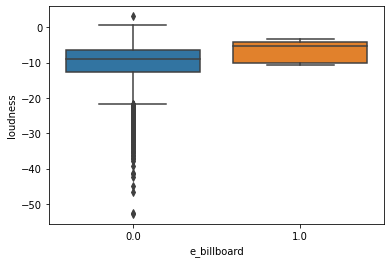

Boxplot grouped by spotify success


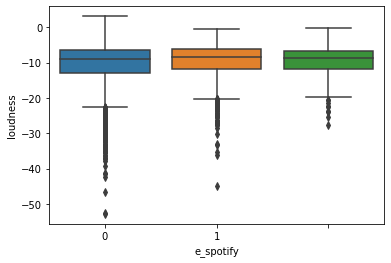

Global boxplot by mode


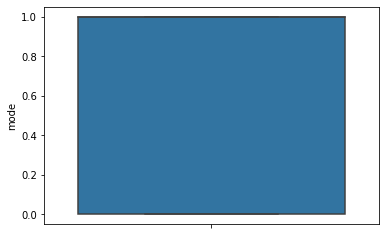

Boxplot grouped by grammy success


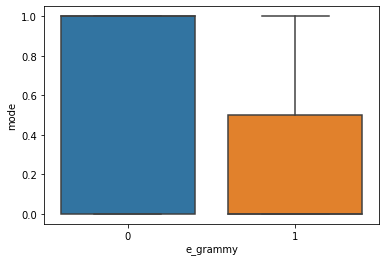

Boxplot grouped by billboard success


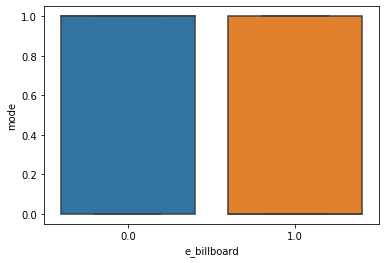

Boxplot grouped by spotify success


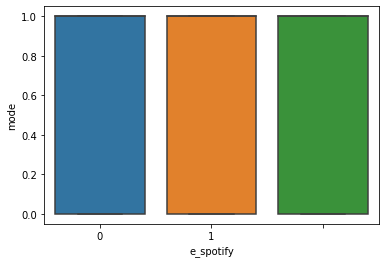

Global boxplot by start_of_fade_out


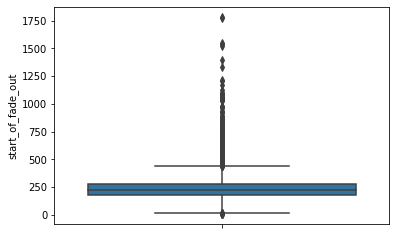

Boxplot grouped by grammy success


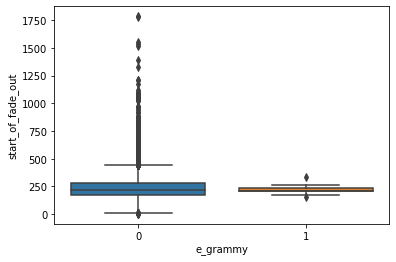

Boxplot grouped by billboard success


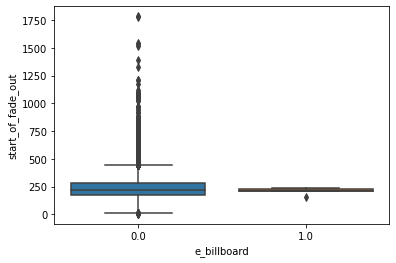

Boxplot grouped by spotify success


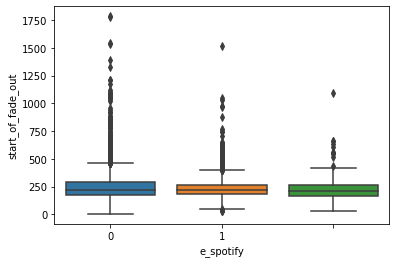

Global boxplot by tempo


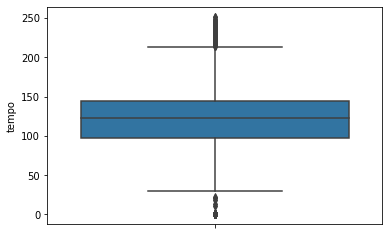

Boxplot grouped by grammy success


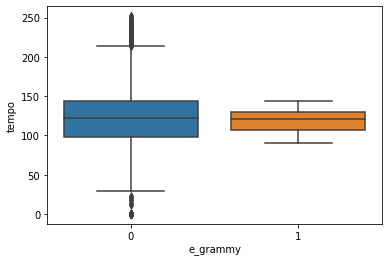

Boxplot grouped by billboard success


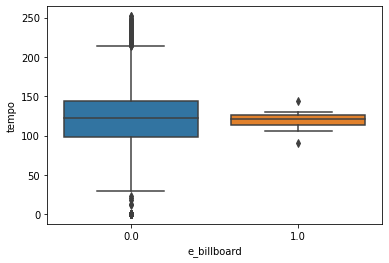

Boxplot grouped by spotify success


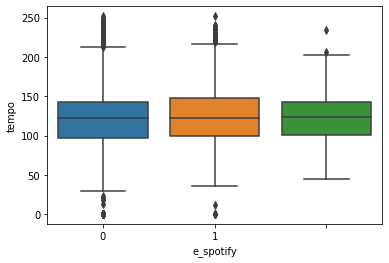

Global boxplot by time_signature


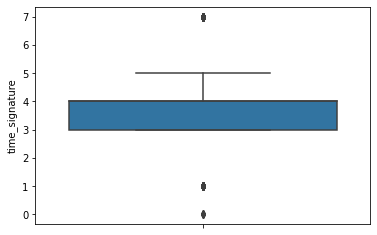

Boxplot grouped by grammy success


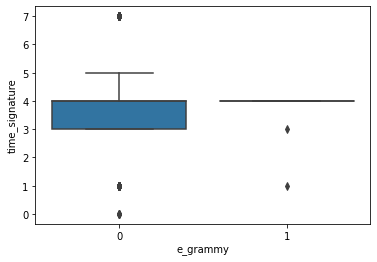

Boxplot grouped by billboard success


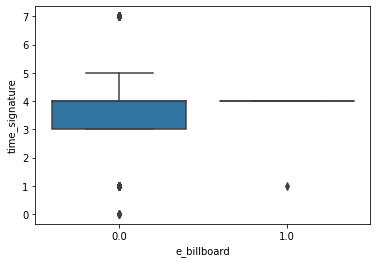

Boxplot grouped by spotify success


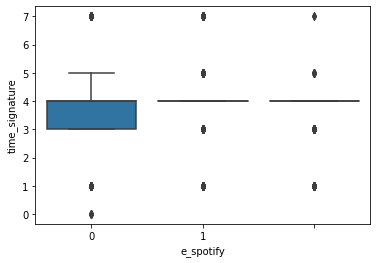

In [64]:
drawAllBoxPlots(new_df)